# Update of Progress
June 1st, 2017



## TCGA and GTEx Metadata

I finally found comprehensive metadata for both GTEx and TCGA, which enriches our feature set for machine learning. TSVs were obtained from [here](http://snaptron.cs.jhu.edu/data).

**Metadata Processing**
1. Read in TSVs
    1. TCGA: 858 columns
    2. GTEX: 301 columns
2. Select possibly interesting features using GSD (Graduate Student Descent)
3. Filter uninformative and spare features
4. Replace string "Nones" with NaNs
5. Group data by DTYPE (to separate out categorical and continuous data)
6. Find intersection of metadata features (which don't match obviously, so use GSD)
    1. id - ID of sample
    2. reads - Number of reads in the sample
    3. size_MB - Size in MB of the sample
    4. platform - Sequencing platform (e.g. Illumina HiSeq)
    5. sex - Male / Female
    6. tissue - Tissue sample originated from
    7. seq_site - Sequencing center site (e.g. UNC, BI)
    8. weight - Weight in lbs
    9. height - Height in in
    10. mapped_reads - Number of mapped reads
    11. race - e.g. white, asian
    12. age - Age of patient
    13. qc - Converted a280 or RNA Integrity Number (RIN)
    14. dataset - TCGA or GTEx
7. Make appropriate conversions
    1. Convert bytes to MB for TCGA
    2. Convert years to birth to age (2010 - year of birth)
    3. Convert a260_a280 to a score similar to RIN
    4. Convert TCGA cm to in
8. Plot values to look for errors, outliers, and correlations
9. One-Hot-Encode all categorical variables (not being used as the classification vector)
10. Pull normalized gene expression values out of DESeq2 to use

### a260_a280 Conversion to RIN Range

By transforming a260 scores to the same range as RIN, a new feature that spans both GTEx and TCGA can be used for learning. 

A "perfect" a260_a280 score is 2.0 and general consensus suggests only using samples between ~1.8 - 2.2. RIN ranges from 0 to 10, with 10 being the highest score. GTEx advises not using samples with a RIN under 6. We can't find a converting factor through systems of equations, but since we know our cutoffs and maximum scores, we can model the conversion as a linear piecewise transformation.

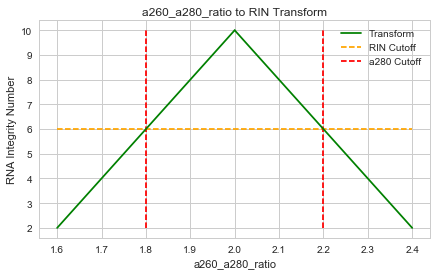

In [40]:
plt.figure(figsize=(7, 4))
x1 = [1.6, 1.7, 1.8, 1.9, 2.0]
x2 = [2.0, 2.1, 2.2, 2.3, 2.4]
plt.plot(x1, [20*x - 30 for x in x1], c='g', label='Transform')
plt.plot(x2, [-20*x + 50 for x in x2], c='g',)
plt.hlines(6, 1.6, 2.4, colors='orange', linestyles='--', label='RIN Cutoff')
plt.vlines(1.8, 2, 10, colors='red', linestyles='--', label='a280 Cutoff')
plt.vlines(2.2, 2, 10, colors='red', linestyles='--')
plt.xlabel('a260_a280_ratio')
plt.ylabel('RNA Integrity Number')
plt.title('a260_a280_ratio to RIN Transform')
plt.legend();

### Combined Manifest

In [101]:
df = pd.read_csv('../../../ipython_notebooks/tcga-gtex-metadata/combined_manifest.tsv', sep='\t', index_col=0)
df.head(2)

,id,reads,size_MB,platform,sex,tissue,seq_site,weight,height,mapped_reads,race,age,qc,dataset
TCGA-CD-8534-01A,TCGA-CD-8534-01A,240016440,14982.158203,Illumina HiSeq,male,Stomach,BCGSC,NaN,NaN,207116695.0,asian,40.0,0.0,tcga
TCGA-ER-A19A-06A,TCGA-ER-A19A-06A,179705496,7383.316781,Illumina HiSeq,male,Skin,UNC,NaN,NaN,178311442.0,white,83.0,4.0,tcga


### Pairwise Plot of Continuous Variables
Draw scatterplots for joint relationships and histograms for univariate distributions

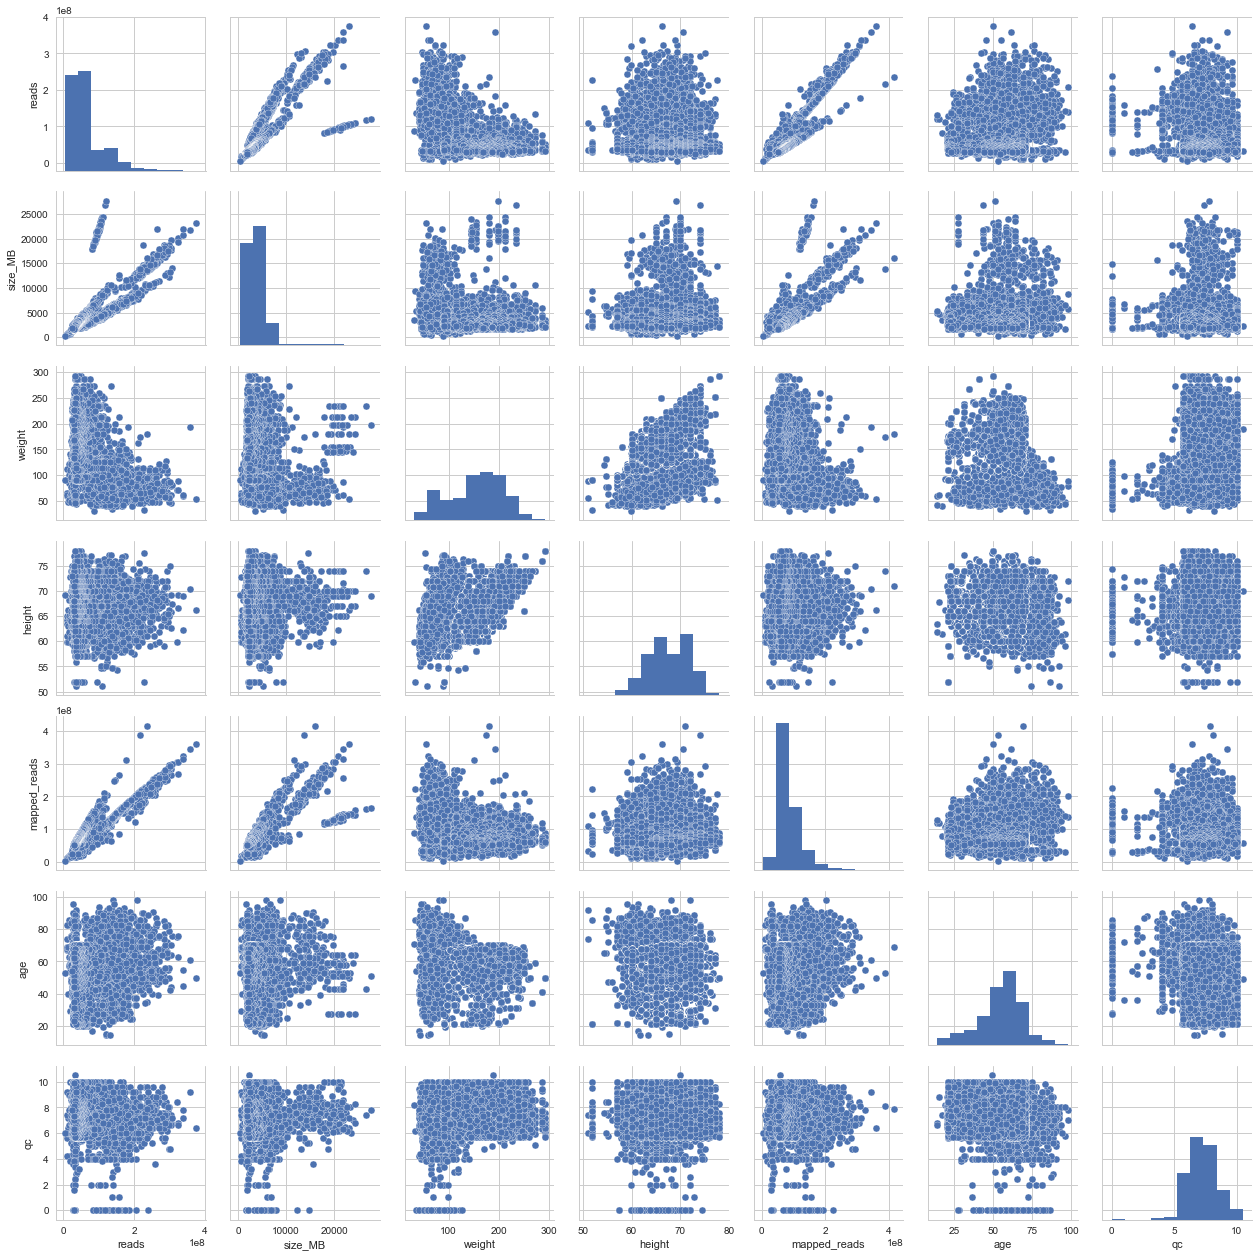

In [102]:
sns.pairplot(data = df[['reads', 'size_MB', 'weight', 'height', 'mapped_reads', 'age', 'qc']].dropna());

### Categorical Features

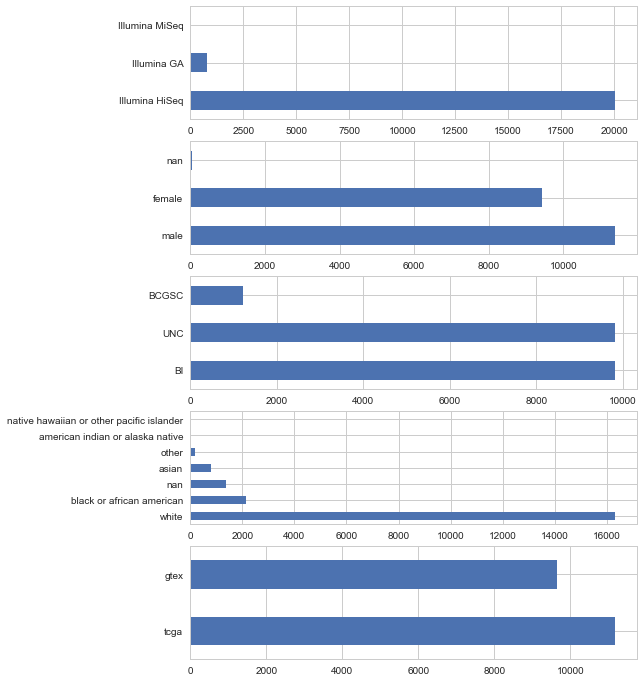

In [96]:
fig, ax = plt.subplots(5, 1, figsize=(8, 12))
ax = ax.flatten()
for i, f in enumerate(['platform', 'sex', 'seq_site', 'race', 'dataset']):
    df[f].value_counts(dropna=False).plot(kind='barh', ax=ax[i])

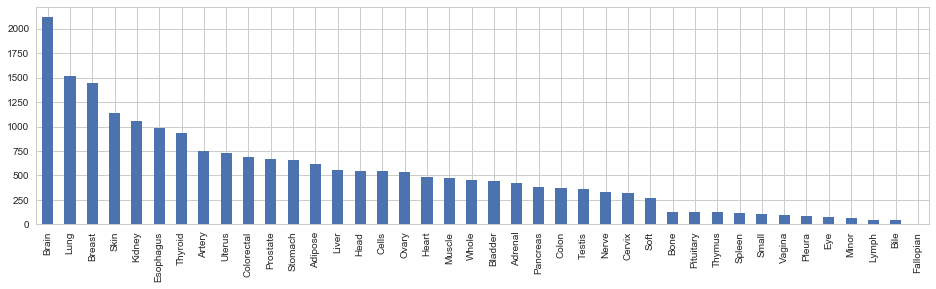

In [85]:
plt.figure(figsize=(16, 4))
df['tissue'].value_counts(dropna=False).plot(kind='bar');

# Classifier Workflow

Generalize a workflow that can be applied any classification question that uses the combined metadata and gene expression data from TCGA and GTEx.

Source code and tests can be found [here](https://github.com/jvivian/rnaseq-recompute-analysis/tree/master/experiments/classifier_workflow).

<img src='classifier-workflow.png'>

## Classifier Questions

Gene expression count data is being normalized with DESeq2 (48 hours and running on 16 cores / 220G of RAM), which handles sequencing depth, variance dispersion shrinkage, and quantile normalization. 

**BLOCKED:** The expression matrix is ~20,000 by ~20,000, so processing will likely take several days. In the interim I can do testing with standard `log2(x + 1)` normalization.

**Questions**


## TETE Clustering

## Advancement

I got the room booked with Tracie

## Production

In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import pandas as pd
import numpy as np